<a href="https://colab.research.google.com/github/ccasadei/corso-ia/blob/master/01Regressione/01RegressioneLineare/regressione01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressione lineare
**Author: Cristiano Casadei**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# importiamo il dataset direttamente dalla URL dove è archiviato
dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data",
                      # indichiamo che il file utilizza un numero indefinito di spazi come separatore di colonna
                      sep="\s+",
                      # indichiamo di utilizzare solo le colonne 5 e 13 che corrispondono al numero di stanze e al valore medio
                      usecols=[5, 13],
                      # assegniamo i nomi alle colonne
                      names=["STANZE", "VALORE"])

# diamo un'occhiata al dataset (solo le prime righe)
print("Diamo uno sguardo al dataset...")
dataset.head()

Diamo uno sguardo al dataset...


,STANZE,VALORE
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2


In [3]:
# associamo ad X i valori di input
# NOTA: in questo caso l'unica proprietà è STANZE, ma in futuro potrebbero esserci diverse proprietà in input
# per cui con questa notazione stiamo dicendo a Pandas di escludere dal dataset la colonna VALORE e di fornire tutte le altre
X = dataset.drop("VALORE", axis=1).values

# associamo ad Y i valori di output
Y = dataset["VALORE"].values

# suddividiamo il dataset in due dataset, uno di training ed uno di test
# sfruttiamo una funzione di SciKitLearn che consente di fare questa operazione con un'unica istruzione
# il parametro test_size indica il rapporto tra la dimensione del set di test e l'intero dataset iniziale
# in questo caso il test_set sarà il 30% del dataset iniziale, ne consegue che il training set sarà il rimanente 70%
# di default l'istruzione mischia i dati del dataset in modo da ottenere sempre training e test set diversi
# è possibile modificare questa modalità tramite l'uso dei parametri shuffle e random_state
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

# istanziamo la classe di calcolo della regressione lineare di SciKitLearn
lRegr = LinearRegression()

# addestriamo la regressione passandogli i dataset di training
lRegr.fit(X_train, Y_train)

# una volta ottenuta la regressione, ne valutiamo la bontà
Y_pred = lRegr.predict(X_test)

In [4]:
# utilizziamo una funzione di costo di tipo "errore quadratico medio" che è del tutto simile alla funzione RSS
# con l'eccezione che il valore ottenuto viene diviso per il numero di punti in input, ottenendo quindi una media
# questo la rende un po' più "robusta" a eventuali picchi anomali, anche se è influenzato sensibilmente dal tipo di dataset
# ovviamente verrà calcolato l'errore tra i valori predetti Y_pred e i valori attesi Y_test
errore = mean_squared_error(Y_test, Y_pred)
print("Errore:", errore)

# otteniamo una misura più oggettiva utilizzando come metrica il coefficiente di determinazione
# NOTA: non è una funzione di costo, ma di punteggio, perchè può avere valori negativi e l'ottimo lo si ottiene
# avvicinandosi ad 1.0
# indicativamente, per punteggio < 0.3 il modello è da inutile
# per punteggio compreso tra 0.3 e 0.5 il modello è mediocre o appena sufficiente
# per punteggio compreso tra 0.5 e 0.7 il modello è discreto
# per punteggio compreso tra 0.7 e 0.9 il modello è buono
# per punteggio > 0.9 il modello è ottimo
punteggio = r2_score(Y_test, Y_pred)
print("Score:", punteggio)

# visualizziamo i valori del peso e del bias trovati
print("Valore del peso:", lRegr.coef_[0])
print("Valore del bias:", lRegr.intercept_)

Errore: 33.855708364297186
Score: 0.5017138578540549
Valore del peso: 9.200004820521546
Valore del bias: -35.40151526984984


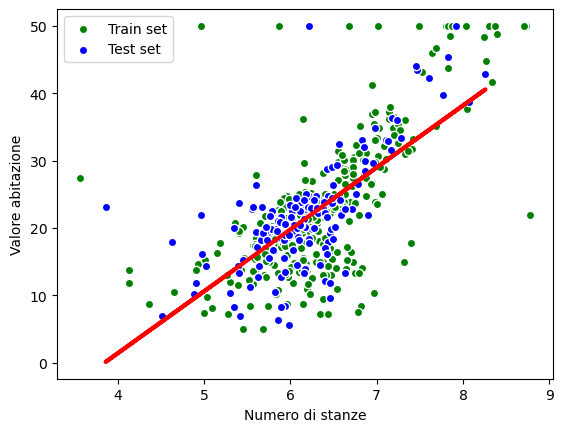

In [5]:
# prepariamo il grafico con i dataset di training (verdi) e di test (blue)
plt.scatter(X_train, Y_train, c="green", edgecolors="white", label="Train set")
plt.scatter(X_test, Y_test, c="blue", edgecolors="white", label="Test set")

# aggiungiamo le label degli assi e indico la posizione della legenda
plt.xlabel("Numero di stanze")
plt.ylabel("Valore abitazione")
plt.legend(loc="upper left")

# prepariamo la retta della regressione in rosso
plt.plot(X_test, Y_pred, color="red", linewidth=3)